# Proyecto final Data Science Batch 4
#Glassdoor- Analyze Gender Pay Gap
Campos de la base de datos
* JobTitle
* Gender
* Age: Age in years
* PerfEval: Performance Evaluation score
* Education: Level of Education
* Dept: Department
* Seniority: Number of years worked
* BasePay: Annual Basic Pay in $
* Bonus: Annual Bonus Pay

Por: Giovanna R

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/Data Science/Glassdoor Gender Pay Gap.csv")
#Obtener el tamaño de la tabla
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1000, 9)

In [ ]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
#Medidas de tendencia central de la base de datos
df.describe(include="all")

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
count,1000,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000
unique,10,2,NaN,NaN,4,5,NaN,NaN,NaN
top,Marketing Associate,Male,NaN,NaN,High School,Operations,NaN,NaN,NaN
freq,118,532,NaN,NaN,265,210,NaN,NaN,NaN
mean,NaN,NaN,41.393000,3.037000,NaN,NaN,2.971000,94472.653000,6467.161000
std,NaN,NaN,14.294856,1.423959,NaN,NaN,1.395029,25337.493272,2004.377365
min,NaN,NaN,18.000000,1.000000,NaN,NaN,1.000000,34208.000000,1703.000000
25%,NaN,NaN,29.000000,2.000000,NaN,NaN,2.000000,76850.250000,4849.500000
50%,NaN,NaN,41.000000,3.000000,NaN,NaN,3.000000,93327.500000,6507.000000
75%,NaN,NaN,54.250000,4.000000,NaN,NaN,4.000000,111558.000000,8026.000000


In [ ]:
#Obteniendo los posibles valores de variables categóricas
print("PerfEval",df["PerfEval"].unique())
print("Education",df["Education"].unique())
print("Department",df["Dept"].unique())
print("Seniority",df["Seniority"].unique())

PerfEval [5 4 3 2 1]
Education ['College' 'PhD' 'Masters' 'High School']
Department ['Operations' 'Management' 'Administration' 'Sales' 'Engineering']
Seniority [2 5 4 3 1]


# 1.1  Identificando valores nulos

In [ ]:
#Conteo de carácteres nulos
(df.isnull().sum()/len(df)).sort_values(ascending=False) 

JobTitle     0.0
Gender       0.0
Age          0.0
PerfEval     0.0
Education    0.0
Dept         0.0
Seniority    0.0
BasePay      0.0
Bonus        0.0
dtype: float64

# Variables numéricas en las que puede haber atípicos
* Age
* BasePay 
* Bonus

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' wh

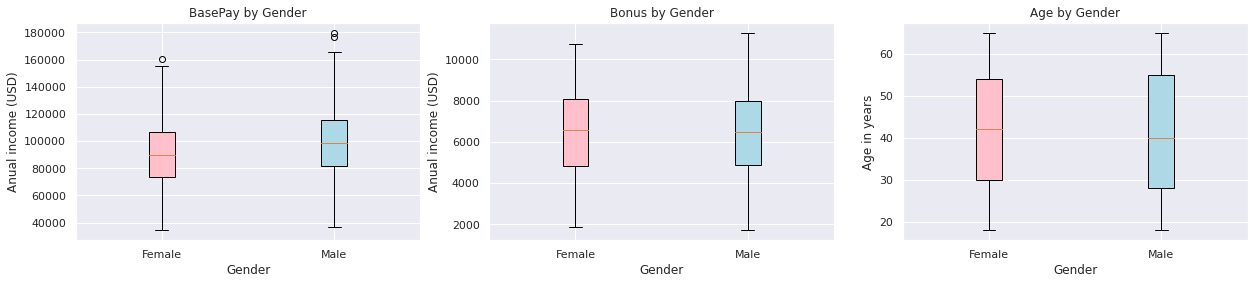

In [ ]:
#Separando la base de datos por género
df_female= df[df.loc[:,'Gender'] == 'Female']
df_male= df[df.loc[:,'Gender'] == 'Male']

#Uniendo dos columnas base para el boxplot
Basepay_gender=[df_female["BasePay"],df_male["BasePay"]]
Bonus_gender=[df_female["Bonus"],df_male["Bonus"]]
Age_gender=[df_female["Age"],df_male["Age"]]

#Configuración de la gráfica
fig1,(ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize =(21, 4))
labels = ['Female', 'Male']

# BasePay plot
bplot1 = ax1.boxplot(Basepay_gender,
                     vert=True,  # vertical 
                     patch_artist=True, # color
                     labels=labels)  # label x-ticks
ax1.set_title('BasePay by Gender')

# Bonus plot
bplot2 = ax2.boxplot(Bonus_gender,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # color
                     labels=labels)  # to label x-ticks
ax2.set_title('Bonus by Gender')

bplot3 = ax3.boxplot(Age_gender,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # color
                     labels=labels)  # to label x-ticks
ax3.set_title('Age by Gender')

# Colores
colors = ['pink', 'lightblue']
for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Grid format
for ax in [ax1, ax2, ax3]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Gender')
    ax.set_ylabel('Anual income (USD)')
    if ax==ax3:
      ax.set_ylabel('Age in years')

plt.show()

In [ ]:
df_female["BasePay"].describe()

count       468.000000
mean      89942.818376
std       24378.277510
min       34208.000000
25%       73186.250000
50%       89913.500000
75%      106923.250000
max      160614.000000
Name: BasePay, dtype: float64

In [ ]:
df_male["BasePay"].describe()

count       532.000000
mean      98457.545113
std       25517.520327
min       36642.000000
25%       81452.500000
50%       98223.000000
75%      115606.250000
max      179726.000000
Name: BasePay, dtype: float64

# 📌Interpretación
* El Q1 y el Q3 del boxplot masculino está entre 80,000 y 115,000
* El Q1 y el Q3 del boxplot femenino está entre 73,000 y 106,000
* De esta forma, la mediana es menor en el salario base femenino que en el masculino en el boxplot. 
* El rango de edad de las mujeres que trabajan es menor que el de los hombres. Sin embargo, la mediana en la edad de los hombres es menor que en las mujeres. 

# 1.2 Limpiando los datos atípicos
Se ordenan con respecto a esta columna para encontrar los índices que hay que limpiar, se saca el promedio de BasePay para los registros con características similares y se sustituye el valor por ese promedio

In [ ]:
df_male.sort_values(by=['BasePay'],ascending=False)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
927,Manager,Male,58,1,PhD,Management,4,179726,4284
353,Manager,Male,59,4,PhD,Sales,5,176789,6773
609,IT,Male,65,4,Masters,Sales,5,165229,6506
799,Manager,Male,55,1,High School,Management,5,163208,4095
869,Software Engineer,Male,59,1,College,Sales,5,160460,2930
...,...,...,...,...,...,...,...,...,...
965,Warehouse Associate,Male,34,1,Masters,Operations,1,45915,4765
543,Driver,Male,25,3,College,Engineering,1,43076,5829
135,Graphic Designer,Male,22,5,PhD,Administration,1,40187,8549
401,Sales Associate,Male,20,3,College,Operations,1,37898,6448


In [ ]:
df_male.loc[[927,353]]

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
927,Manager,Male,58,1,PhD,Management,4,179726,4284
353,Manager,Male,59,4,PhD,Sales,5,176789,6773


In [ ]:
df_male.groupby(['JobTitle',df.loc[:,"Education"]=="PhD",df.loc[:,"Seniority"]>=4])['BasePay'].mean()

JobTitle             Education  Seniority
Data Scientist       False      False         83212.264706
                                True         102782.428571
                     True       False         93021.600000
                                True         100527.500000
Driver               False      False         79595.473684
                                True         100975.466667
                     True       False         94921.600000
                                True         106052.666667
Financial Analyst    False      False         87143.296296
                                True         109438.538462
                     True       False         86094.545455
                                True         109228.285714
Graphic Designer     False      False         78731.523810
                                True         103903.000000
                     True       False         74713.428571
                                True         109759.000000
IT            

In [ ]:
df_male["BasePay"]=df_male["BasePay"].replace([179726,176789],146998)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_male.loc[[927,353]]

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
927,Manager,Male,58,1,PhD,Management,4,146998,4284
353,Manager,Male,59,4,PhD,Sales,5,146998,6773


In [ ]:
df_female.sort_values(by=['BasePay'],ascending=False)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
357,Manager,Female,60,4,PhD,Management,3,160614,8354
327,Manager,Female,62,4,Masters,Sales,4,155203,7808
835,Manager,Female,45,1,High School,Engineering,5,149893,5120
96,Financial Analyst,Female,47,5,High School,Sales,5,146190,8961
707,Manager,Female,62,4,Masters,Administration,3,146008,6235
...,...,...,...,...,...,...,...,...,...
266,Warehouse Associate,Female,19,4,High School,Operations,1,37026,8636
590,Marketing Associate,Female,41,3,High School,Administration,2,36972,7058
824,Marketing Associate,Female,26,1,High School,Management,1,36585,4373
348,Marketing Associate,Female,22,4,PhD,Operations,1,36548,8090


In [ ]:
df_female.loc[[357]]

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
357,Manager,Female,60,4,PhD,Management,3,160614,8354


In [ ]:
df_female.groupby(['JobTitle',df.loc[:,"Education"]=="PhD",df.loc[:,"Seniority"]>=3])['BasePay'].mean()

JobTitle             Education  Seniority
Data Scientist       False      False         79366.727273
                                True         100732.153846
                     True       False         93824.000000
                                True         107007.333333
Driver               False      False         73665.210526
                                True          93273.937500
                     True       False         93993.600000
                                True         105653.500000
Financial Analyst    False      False         80526.437500
                                True         106051.920000
                     True       False         77737.250000
                                True         106697.000000
Graphic Designer     False      False         66761.833333
                                True         103118.500000
                     True       False         80643.000000
                                True         100503.714286
IT            

In [ ]:
df_female["BasePay"]=df_female["BasePay"].replace([160614],132408)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_female.loc[[357]]

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
357,Manager,Female,60,4,PhD,Management,3,132408,8354


#  1.3 Unión de las bases de datos limpias y creación de columna para conteos

In [ ]:
#Creando una nueva columna para hacer conteos
df_clean = pd.concat([df_female, df_male])
df_clean=df_clean.reset_index(drop=True)
df_clean['ones'] = 1
df_clean.sample(5)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,ones
818,Financial Analyst,Male,36,3,PhD,Operations,1,93067,5103,1
52,Financial Analyst,Female,43,5,PhD,Management,3,117554,8369,1
506,Graphic Designer,Male,23,5,Masters,Management,3,83031,10240,1
691,Manager,Male,57,4,Masters,Administration,4,143189,6321,1
721,Graphic Designer,Male,62,5,Masters,Sales,1,85702,6556,1


In [ ]:
df_clean.shape

(1000, 10)

# 1.5 Creando bins para Age,  Bonus y Base Pay

In [ ]:
df_clean.describe(include="all")

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,ones
count,1000,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.0
unique,10,2,NaN,NaN,4,5,NaN,NaN,NaN,NaN
top,Marketing Associate,Male,NaN,NaN,High School,Operations,NaN,NaN,NaN,NaN
freq,118,532,NaN,NaN,265,210,NaN,NaN,NaN,NaN
mean,NaN,NaN,41.393000,3.037000,NaN,NaN,2.971000,94381.928000,6467.161000,1.0
std,NaN,NaN,14.294856,1.423959,NaN,NaN,1.395029,25109.897958,2004.377365,0.0
min,NaN,NaN,18.000000,1.000000,NaN,NaN,1.000000,34208.000000,1703.000000,1.0
25%,NaN,NaN,29.000000,2.000000,NaN,NaN,2.000000,76850.250000,4849.500000,1.0
50%,NaN,NaN,41.000000,3.000000,NaN,NaN,3.000000,93327.500000,6507.000000,1.0
75%,NaN,NaN,54.250000,4.000000,NaN,NaN,4.000000,111558.000000,8026.000000,1.0


In [ ]:
#Bins edad
df_clean_bins=df_clean.drop(["ones"], axis=1)
bins_age=[17,33,49,66]
names = ['Young','Middle-aged ','Old Adults']
df_clean_bins['Age'] = pd.cut(df_clean_bins['Age'], bins = bins_age, labels=names)
df_clean_bins.sample(5)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
326,IT,Female,Old Adults,3,Masters,Management,2,101791,6083
855,Software Engineer,Male,Young,1,College,Engineering,5,128680,4677
680,Financial Analyst,Male,Old Adults,5,PhD,Management,1,90002,8123
89,IT,Female,Young,4,Masters,Management,3,72542,8109
726,Warehouse Associate,Male,Middle-aged,3,College,Management,3,83774,7127


In [ ]:
#Bins BasePay
bins_basepay=[34200,65650,165500]
# Significados 'Low',"High"
names = [0,1]
df_clean_bins['BasePay'] = pd.cut(df_clean_bins['BasePay'], bins = bins_basepay, labels=names)
df_clean_bins.sample(5)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
470,Graphic Designer,Male,Young,5,Masters,Engineering,5,1,9319
486,IT,Male,Young,5,College,Administration,4,1,9023
263,Financial Analyst,Female,Young,3,College,Administration,2,0,6604
989,Sales Associate,Male,Old Adults,1,High School,Management,1,1,2375
962,Financial Analyst,Male,Middle-aged,1,PhD,Sales,4,1,4143


In [ ]:
#Bins Bonus
bins_bonus=[1700,4800,11300]
# Significados 'Low',"High"
names = [0,1]
df_clean_bins['Bonus'] = pd.cut(df_clean_bins['Bonus'], bins = bins_bonus, labels=names)
df_clean_bins.sample(5)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
821,Financial Analyst,Male,Old Adults,4,Masters,Operations,3,1,1
924,Sales Associate,Male,Middle-aged,2,High School,Operations,3,1,0
405,Financial Analyst,Female,Middle-aged,2,PhD,Operations,3,1,1
508,Warehouse Associate,Male,Young,5,PhD,Management,1,0,1
775,Graphic Designer,Male,Young,2,High School,Sales,3,1,1


In [ ]:
df_clean_bins['Genderflg'] = np.where(df['Gender']=='Female',1,0)

In [ ]:
df_clean_bins.sample(5)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Genderflg
968,Warehouse Associate,Male,Old Adults,1,College,Operations,4,1,0,0
557,Sales Associate,Male,Old Adults,5,PhD,Sales,2,1,1,1
462,Graphic Designer,Female,Old Adults,1,Masters,Engineering,1,1,0,0
75,Software Engineer,Female,Young,3,PhD,Engineering,4,1,1,1
692,Graphic Designer,Male,Old Adults,5,PhD,Engineering,1,1,1,1


# 1.4 Creación de variables dummies

In [ ]:
df_clean_bins_dummies=pd.get_dummies(df_clean_bins, columns=["JobTitle","Age",'Education','Dept'])
df_clean_bins_dummies.head()

,Gender,PerfEval,Seniority,BasePay,Bonus,Genderflg,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,...,Age_Old Adults,Education_College,Education_High School,Education_Masters,Education_PhD,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
0,Female,5,2,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,Female,4,5,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,Female,5,4,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,Female,5,4,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,Female,5,5,1,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
df_clean_bins_dummies.columns

Index(['Gender', 'PerfEval', 'Seniority', 'BasePay', 'Bonus', 'Genderflg',
       'JobTitle_Data Scientist', 'JobTitle_Driver',
       'JobTitle_Financial Analyst', 'JobTitle_Graphic Designer',
       'JobTitle_IT', 'JobTitle_Manager', 'JobTitle_Marketing Associate',
       'JobTitle_Sales Associate', 'JobTitle_Software Engineer',
       'JobTitle_Warehouse Associate', 'Age_Young', 'Age_Middle-aged ',
       'Age_Old Adults', 'Education_College', 'Education_High School',
       'Education_Masters', 'Education_PhD', 'Dept_Administration',
       'Dept_Engineering', 'Dept_Management', 'Dept_Operations', 'Dept_Sales'],
      dtype='object')

# 2. Análisis exploratorio y gráficas
Recurso de ayuda para generar visualizaciones de datos [Link](https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/)

2.1 Conteo de registros

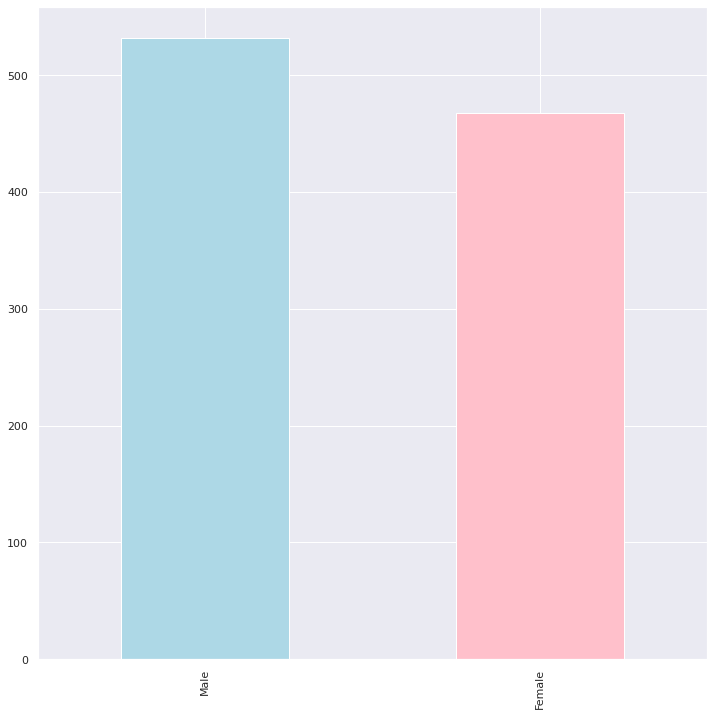

In [ ]:
#Conteo del número de registros por género
df_clean['Gender'].value_counts().plot(kind='bar', color=['lightblue',"pink"])

2.2 Conteo de registros por industria y género, senority por género

Text(0.5, 1.0, 'Industry counts by Gender')

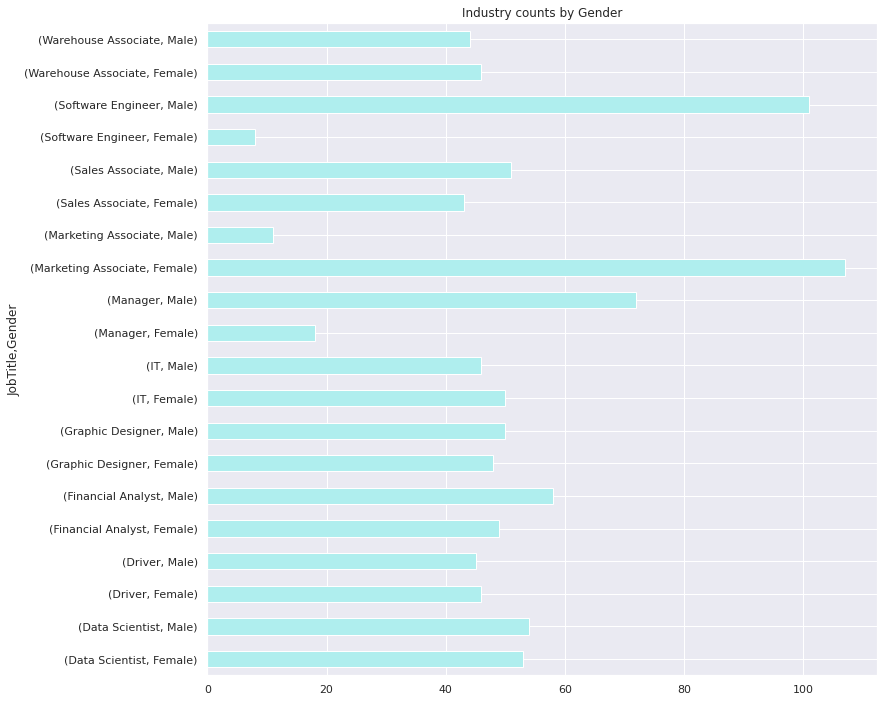

In [ ]:
gender_industry=df_clean.groupby(['JobTitle','Gender'])[['ones']].sum()
gender_industry.plot.barh(color=['paleturquoise'])
plt.legend().remove()
plt.title('Industry counts by Gender')

Text(0.5, 0, 'Counts')

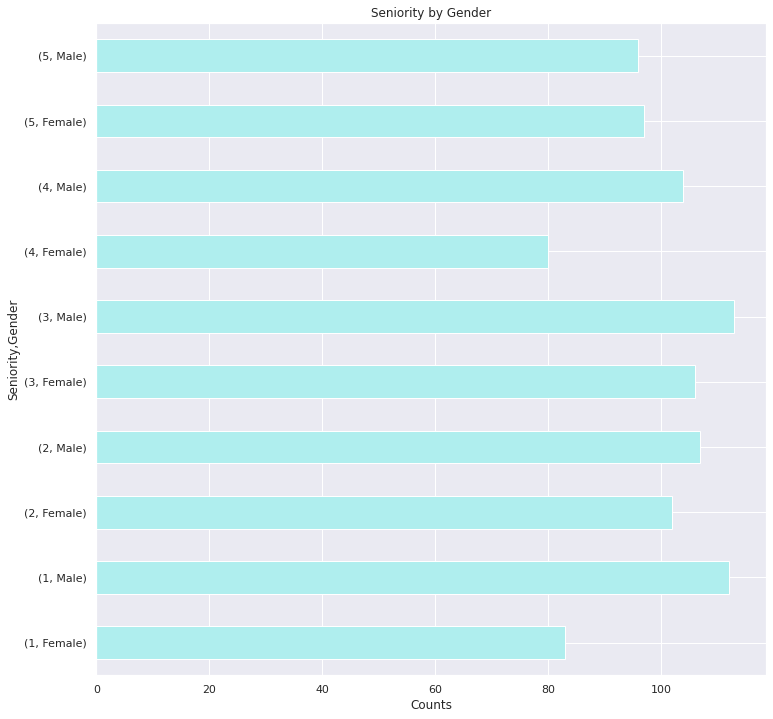

In [ ]:
gender_seniority=df_clean.groupby(['Seniority','Gender'])[['ones']].sum()
gender_seniority.plot.barh(color=['paleturquoise'])
plt.legend().remove()
plt.title('Seniority by Gender')
plt.xlabel("Counts")

2.3 Heatmap

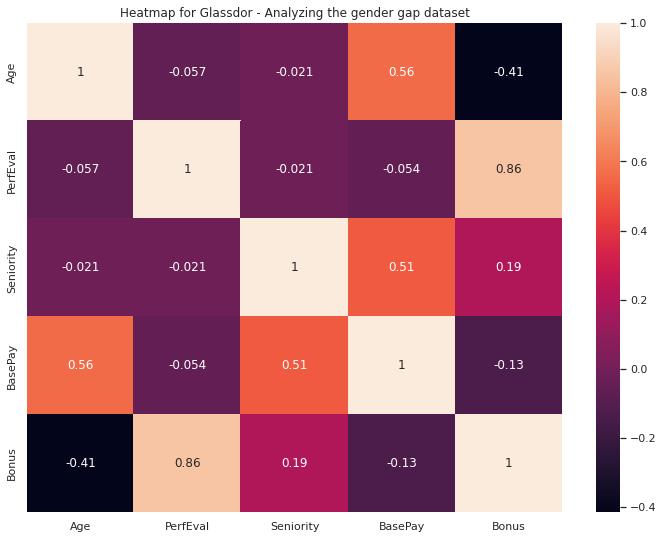

In [ ]:
#Heatmap
df_corr=df_clean.drop(['ones'], axis=1)
corrmatrix=df_corr.corr()
dimensiones=(12,9)
fig, ax =plt.subplots (figsize=dimensiones)
sns.heatmap(corrmatrix, annot=True)
plt.title("Heatmap for Glassdor - Analyzing the gender gap dataset")
plt.show()

2.4 Desempeño por género

In [ ]:
#Pago promedio anualpor género
(df_clean.groupby('Gender')['BasePay'].mean()).sort_values(ascending=False)

Gender
Male      98340.028195
Female    89882.549145
Name: BasePay, dtype: float64

In [ ]:
#Conteo de las calificaciones de las evaluaciones de desempeño por género
counts_perfeval=df_clean.groupby('Gender')['PerfEval'].value_counts()
counts_perfeval

Gender  PerfEval
Female  1           106
        4            96
        2            90
        3            88
        5            88
Male    5           121
        4           111
        3           106
        2           102
        1            92
Name: PerfEval, dtype: int64

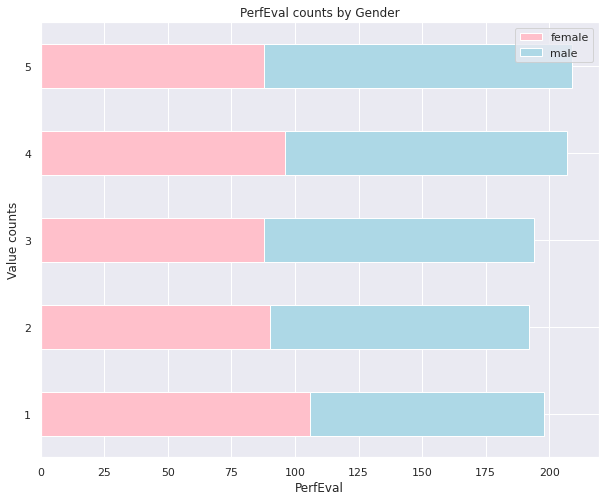

In [ ]:
#Gráfica para el desempeño por género
eval=[1,2,3,4,5]
data={"female":[106, 90, 88, 96, 88],
"male":[92,102,106,111,121]}
gender_eval=pd.DataFrame(data,index=eval)
gender_eval.plot(kind="barh",stacked=True,figsize=(10,8),color=["pink",'lightblue'])
plt.xlabel("PerfEval")
plt.ylabel("Value counts")
plt.title('PerfEval counts by Gender')
plt.show()

2.5 Distribución BasePay tras la limpieza

In [ ]:
df_clean["BasePay"].describe()

count      1000.000000
mean      94381.928000
std       25109.897958
min       34208.000000
25%       76850.250000
50%       93327.500000
75%      111558.000000
max      165229.000000
Name: BasePay, dtype: float64

In [ ]:
df_female["BasePay"].describe()

count       468.000000
mean      89882.549145
std       24237.646991
min       34208.000000
25%       73186.250000
50%       89913.500000
75%      106923.250000
max      155203.000000
Name: BasePay, dtype: float64

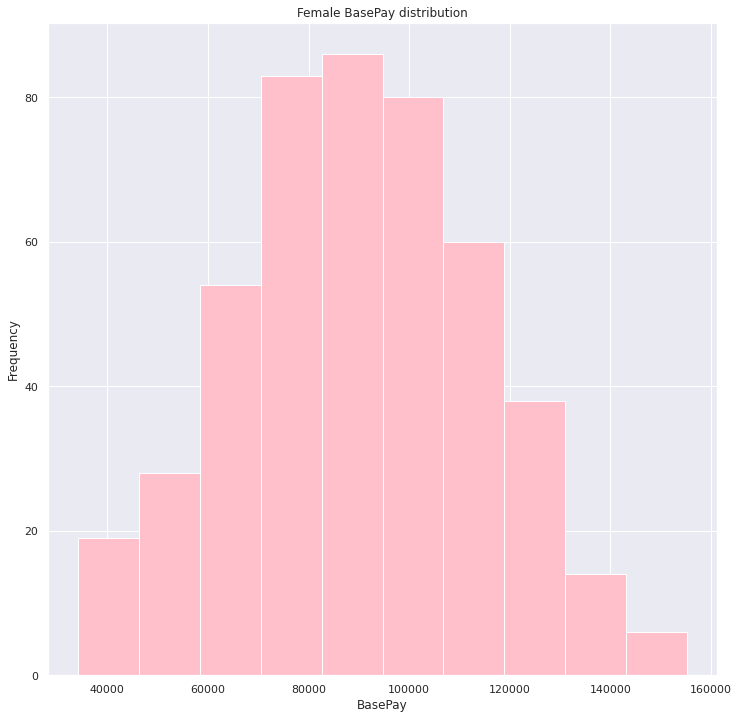

In [ ]:
df_female["BasePay"].plot.hist(color="pink")
plt.xlabel("BasePay")
plt.title('Female BasePay distribution')
plt.show()

In [ ]:
df_male["BasePay"].describe()

count       532.000000
mean      98340.028195
std       25219.264708
min       36642.000000
25%       81452.500000
50%       98223.000000
75%      115606.250000
max      165229.000000
Name: BasePay, dtype: float64

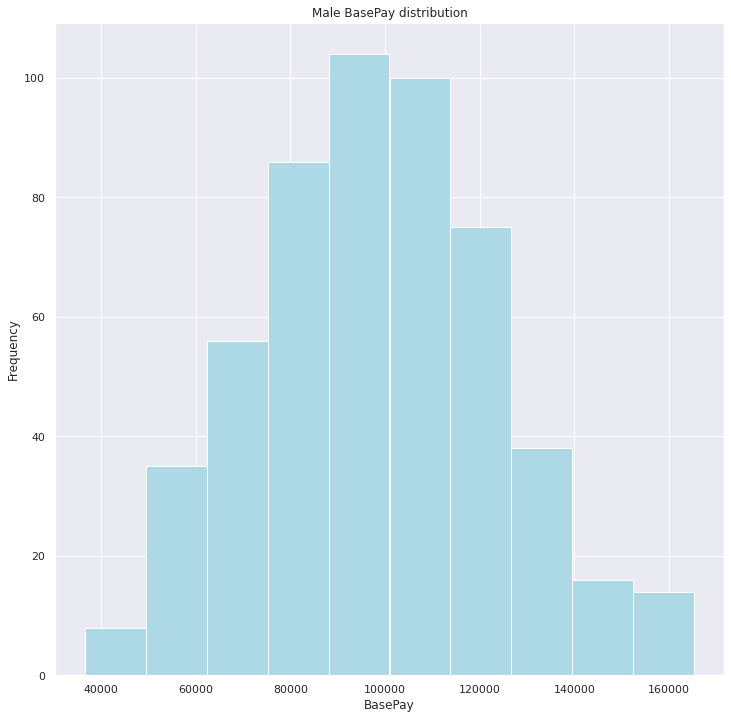

In [ ]:
df_male["BasePay"].plot.hist(color="lightblue")
plt.xlabel("BasePay")
plt.title('Male BasePay distribution')
plt.show()

2.6 BasePay, industria (y género)

In [ ]:
#BasePay promedio por género e industria
(df_clean.groupby(['JobTitle','Gender'])['BasePay'].mean()).sort_values(ascending=False)

JobTitle             Gender
Manager              Female    125685.277778
                     Male      123980.611111
Software Engineer    Male      106371.485149
Data Scientist       Female     95704.792453
Financial Analyst    Female     95458.326531
Software Engineer    Female     94701.000000
Sales Associate      Male       94663.117647
Financial Analyst    Male       94607.034483
Warehouse Associate  Female     92428.260870
Graphic Designer     Female     92243.291667
Driver               Male       91952.666667
Sales Associate      Female     91894.209302
IT                   Male       91021.978261
                     Female     90475.720000
Graphic Designer     Male       89595.800000
Data Scientist       Male       89222.629630
Driver               Female     86867.630435
Warehouse Associate  Male       86553.431818
Marketing Associate  Male       81881.818182
                     Female     76119.177570
Name: BasePay, dtype: float64

In [ ]:
#Gráfica de burbujas con los promedios, en donde los colores sean el gender y la tercera dimensión sea el número de registros en la industria
px.scatter(df_clean, y="Bonus", x="BasePay", size="Seniority", color="Gender", size_max=10)

In [ ]:
#Gráfica de burbujas con los promedios, en donde los colores sean el gender y la tercera dimensión sea el número de registros en la industria
px.scatter(df_clean, y="Bonus", x="BasePay", size="Seniority", color="JobTitle", size_max=10)

# Notas respecto a los resultados de las agrupaciones
A pesar de que female-manager es la agrupación con el mayor BasePay mensual promedio, sólo son 18 mujeres las que han alcanzado esa clase de puestos, mientras que hay 72 male-managers, los cuales son la segunda agrupación con mayor BasePay.


# 3. Modelado por decision tree & Random Forest + Evaluación del modelo
* El género es una variable importante a la hora de determinar el salario
* Las mujeres están en desventaja porque su vida laboral es más corta y, entre más años se tenga en una industria, más probabilidad de tener un sueldo mayor

# 3.1 Asignando matriz de variables predictoras y vector de resultados

In [ ]:
df_clean_bins_dummies.sample(10)

,Gender,PerfEval,Seniority,BasePay,Bonus,Genderflg,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,...,Age_Old Adults,Education_College,Education_High School,Education_Masters,Education_PhD,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
22,Female,5,3,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
776,Male,1,5,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
342,Female,3,4,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
176,Female,4,2,1,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
30,Female,5,4,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
320,Female,1,5,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
108,Female,4,2,1,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
112,Female,4,1,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
874,Male,3,3,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
815,Male,2,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
#Vector de resultados
Y=df_clean_bins_dummies["BasePay"]

In [ ]:
#Matriz de variables predictoras
X=df_clean_bins_dummies.drop(["BasePay","Bonus","Gender"], axis=1)

# 3.2 Separando el dataset en train y test en una relación de 80:20

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=99)

In [ ]:
x_train.sample(5)

,PerfEval,Seniority,Genderflg,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,...,Age_Old Adults,Education_College,Education_High School,Education_Masters,Education_PhD,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
236,3,5,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
799,2,5,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
849,3,2,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
39,5,5,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
537,5,4,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
y_train.sample(5)

818    1
91     1
247    1
851    1
276    1
Name: BasePay, dtype: category
Categories (2, int64): [0 < 1]

# 3.3 Árbol de decisión - Hiperparametrización para encontrar el número de ramas más adecuado

In [ ]:
#Hiperparametrización
for numero in (range(1,10)):
  t = tree.DecisionTreeClassifier(max_depth=numero)
  model = t.fit(x_train, y_train)
  print("Ramas:",numero,"Train:", round(model.score(x_train, y_train),4), "Test: ", round(model.score(x_test, y_test),4), "Diferencia: ", round(model.score(x_train, y_train)-model.score(x_test, y_test),4))

Ramas: 1 Train: 0.8662 Test:  0.875 Diferencia:  -0.0088
Ramas: 2 Train: 0.88 Test:  0.905 Diferencia:  -0.025
Ramas: 3 Train: 0.8938 Test:  0.905 Diferencia:  -0.0112
Ramas: 4 Train: 0.9138 Test:  0.93 Diferencia:  -0.0163
Ramas: 5 Train: 0.9238 Test:  0.92 Diferencia:  0.0037
Ramas: 6 Train: 0.9325 Test:  0.915 Diferencia:  0.0175
Ramas: 7 Train: 0.9388 Test:  0.905 Diferencia:  0.0337
Ramas: 8 Train: 0.9488 Test:  0.89 Diferencia:  0.0587
Ramas: 9 Train: 0.965 Test:  0.89 Diferencia:  0.075


In [ ]:
t = tree.DecisionTreeClassifier(max_depth=5)
model = t.fit(x_train, y_train)

In [ ]:
print("Train:", round(model.score(x_train, y_train),4), "Test: ", round(model.score(x_test, y_test),4), "Diferencia: ", round(model.score(x_train, y_train)-model.score(x_test, y_test),4))

Train: 0.9238 Test:  0.92 Diferencia:  0.0037


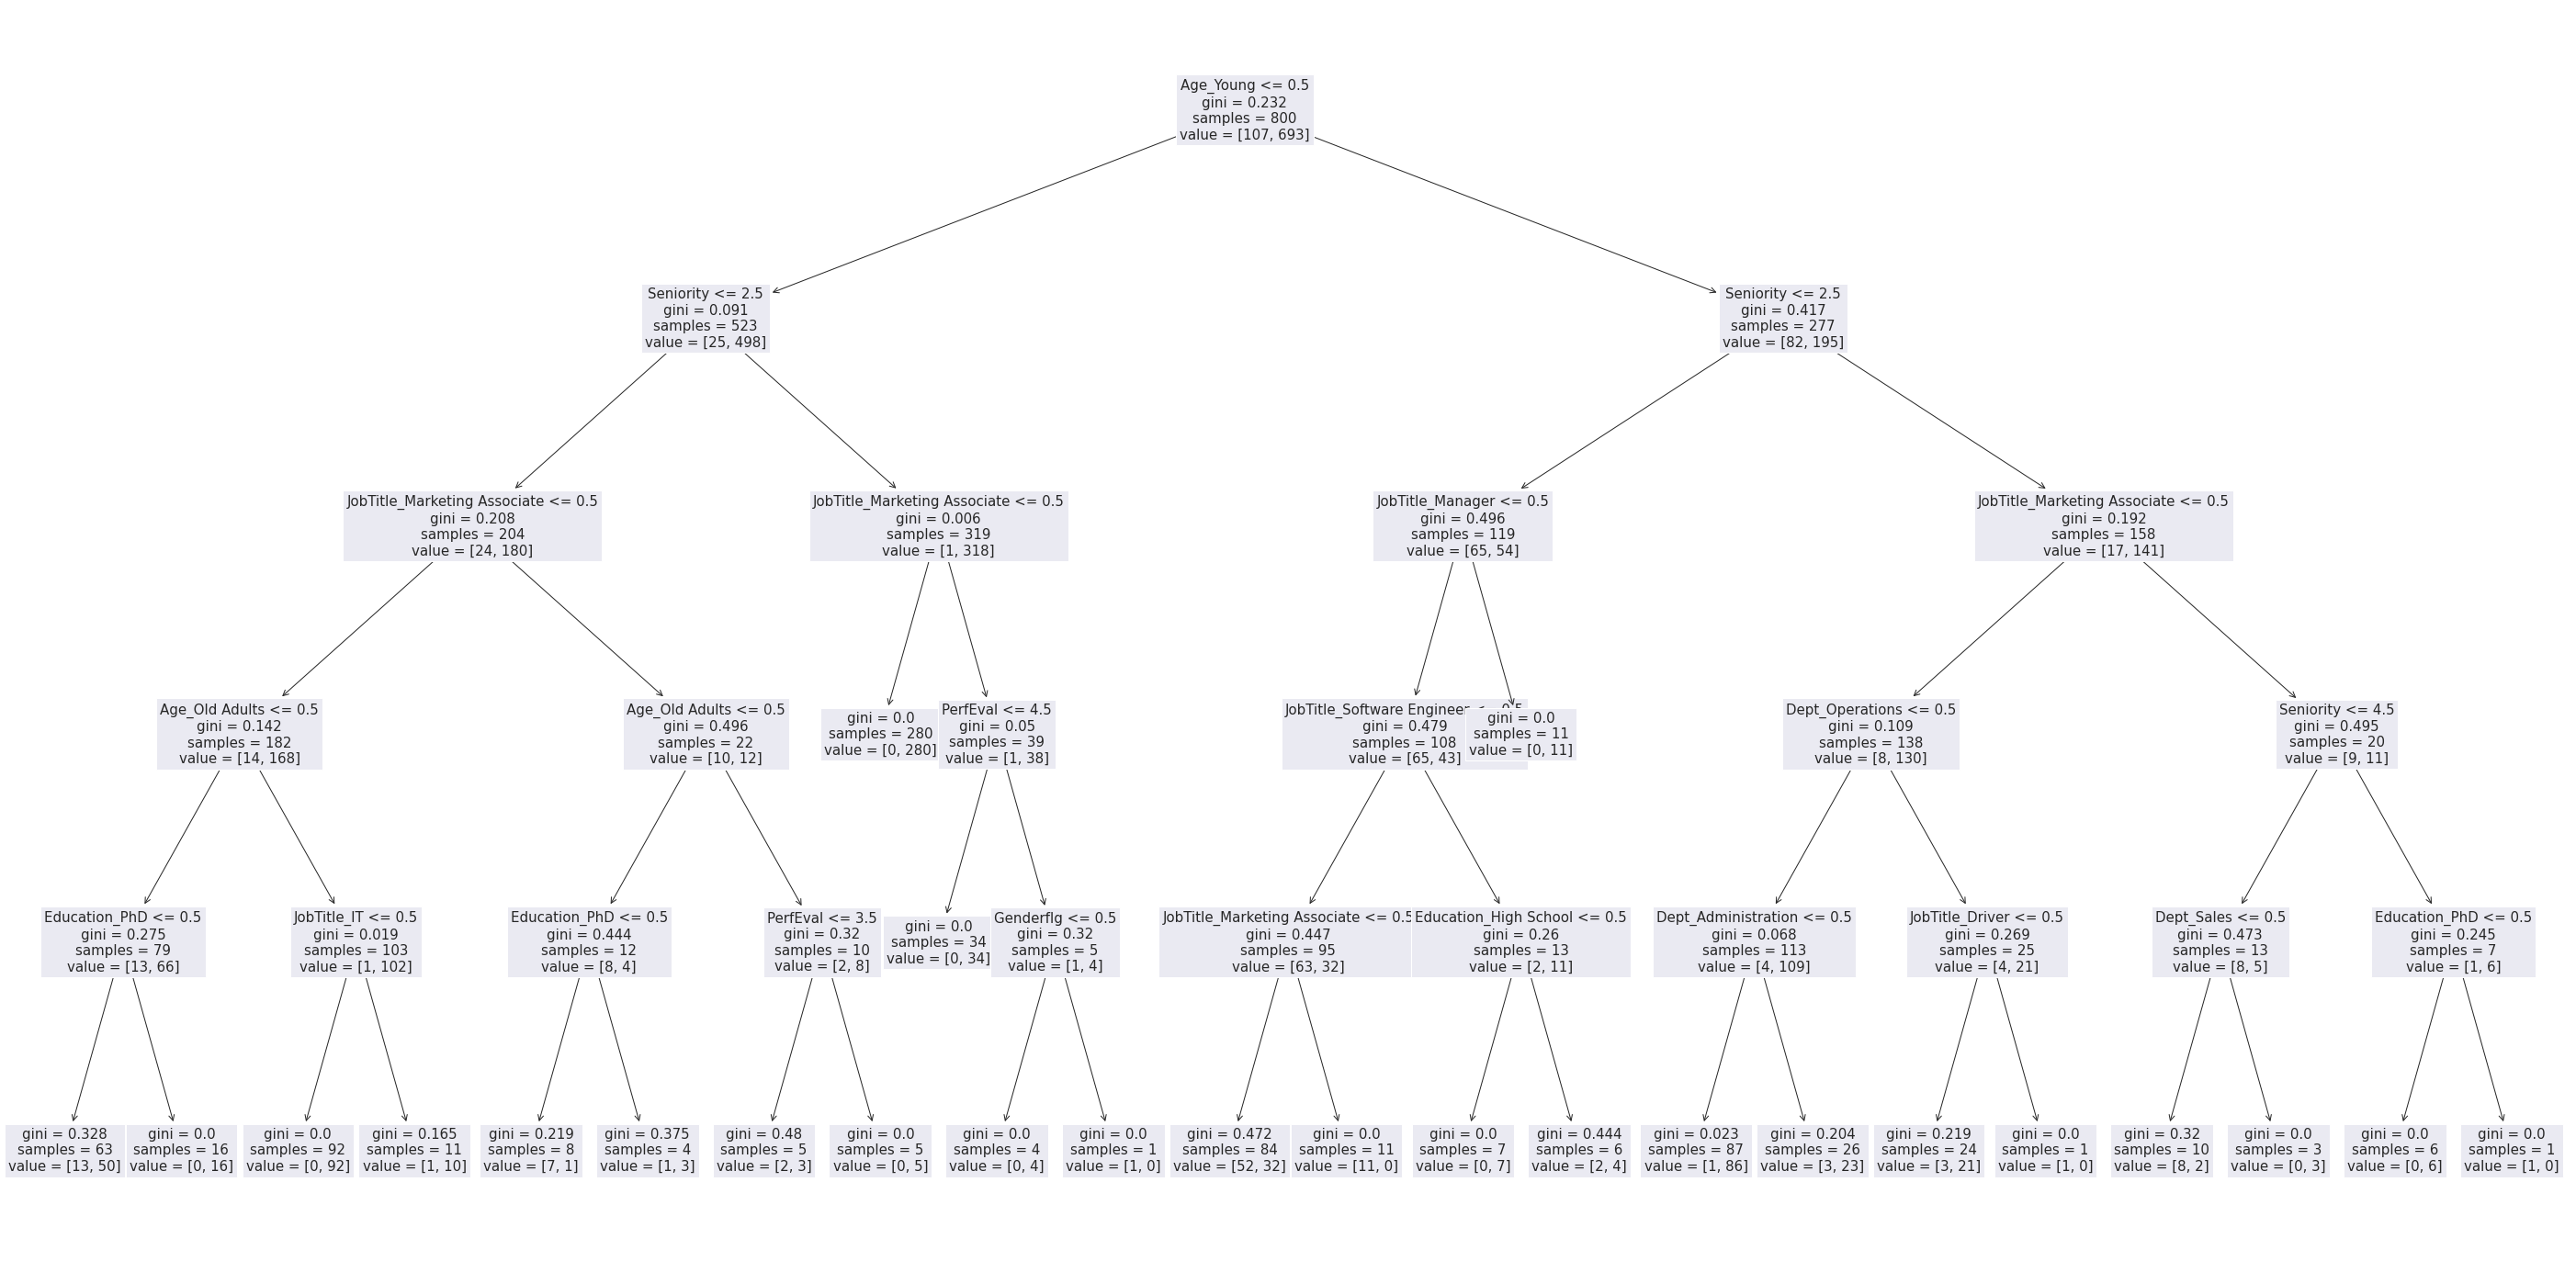

In [ ]:
dimensiones=(50,25)
fig, ax = plt.subplots(figsize=dimensiones)
tree.plot_tree( t, feature_names=X.columns, fontsize=15)
plt.show()

# 3.4 Random Forest

In [ ]:
df_clean_bins_dummies.sample(5)

,Gender,PerfEval,Seniority,BasePay,Bonus,Genderflg,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,...,Age_Old Adults,Education_College,Education_High School,Education_Masters,Education_PhD,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
294,Female,3,5,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
698,Male,4,1,1,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
720,Male,4,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
365,Female,2,2,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
448,Female,1,3,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, log_loss, roc_auc_score
import statsmodels.api as sm 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Random Forest
X=df_clean_bins_dummies.drop(["BasePay","Bonus","Gender"], axis=1)
Y= df_clean_bins_dummies['BasePay']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state = 0)
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
print("Train:", round(rf.score(x_train, y_train),4), "Test: ", round(rf.score(x_test, y_test),4), "Diferencia: ", round(rf.score(x_train, y_train)-model.score(x_test, y_test),4))

Train: 0.7738 Test:  0.78 Diferencia:  -0.0112


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



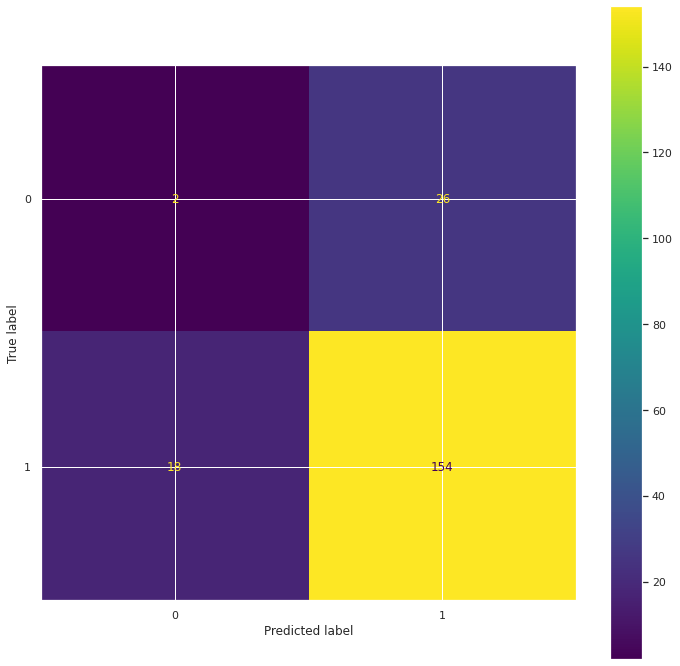

In [ ]:
#Generate the confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
plot_confusion_matrix(rf, x_test, y_test)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



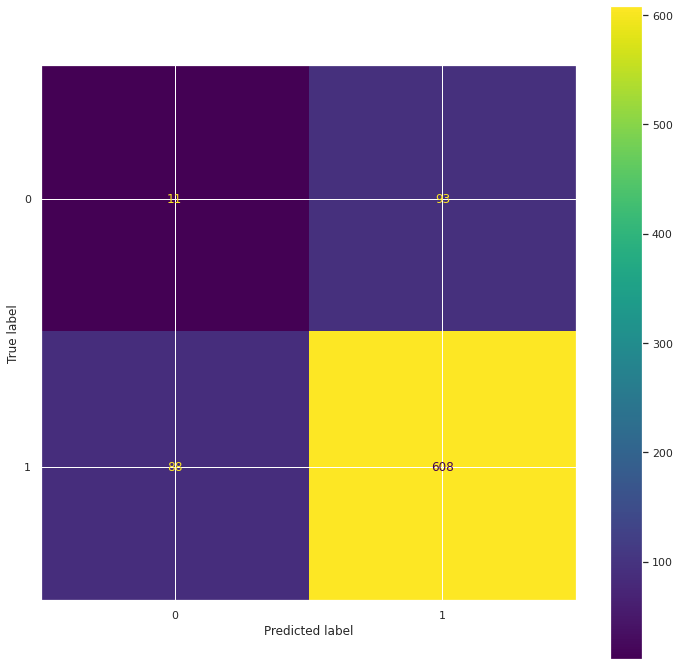

In [ ]:
#Generate the confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
plot_confusion_matrix(rf, x_train, y_train)  
plt.show()

No handles with labels found to put in legend.


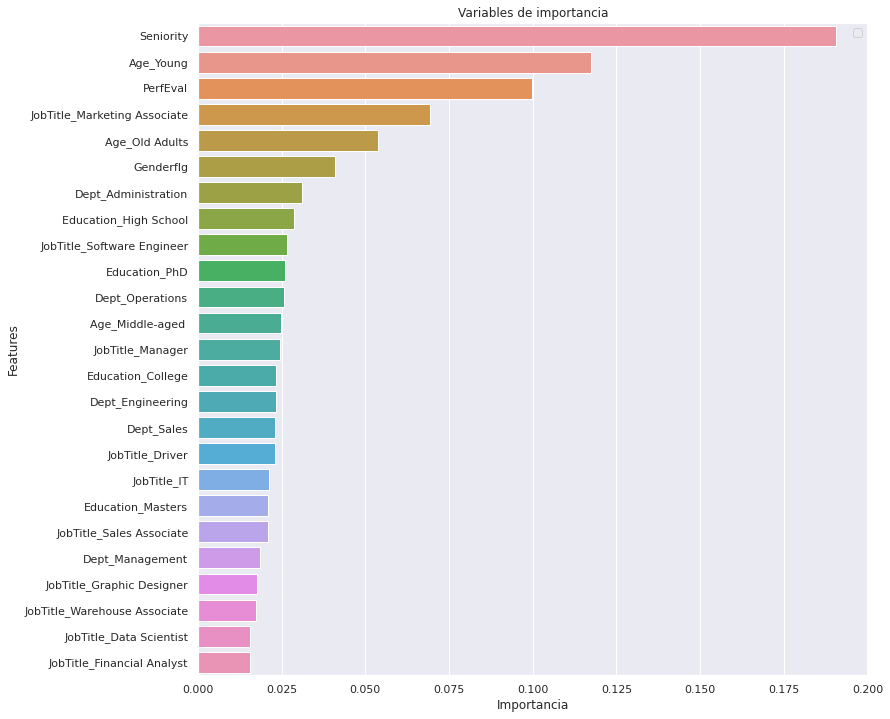

In [ ]:
#Determinación de variables de importancia para tener un salario alto de acuerdo con el random forest
variables_importantes = pd.Series(rf.feature_importances_,index=X.columns.values).sort_values(ascending=False)
sns.barplot(x=variables_importantes, y=variables_importantes.index)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title("Variables de importancia")
plt.legend()
plt.show()
sns.set(rc={'figure.figsize':(12,12)})